In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import torch
from torch.nn import functional as F
from scipy import stats
import matplotlib.pyplot as plt

from wavenet import model, train, utils, viz

In [3]:
p, n_examples, n_samples = model.HParams(), 2**13, 2
X = utils.stereo_impulse_at_t0(n_examples, n_samples, p, probs=(0.3, 0.7))
X[:, :, 1] = 100 # shift zeros in sample to 100
m = model.Wavenet(p)
animation = viz.LearningAnimation(n_samples)
t = train.Trainer(m, X, None, train.HParams(max_epochs=1), animation)

In [4]:
t.train()

epoch 1 iter 127: train loss 1.72519. lr 3.000000e-04: 100%|██████████| 128/128 [02:36<00:00,  1.22s/it]


<Figure size 1296x576 with 0 Axes>

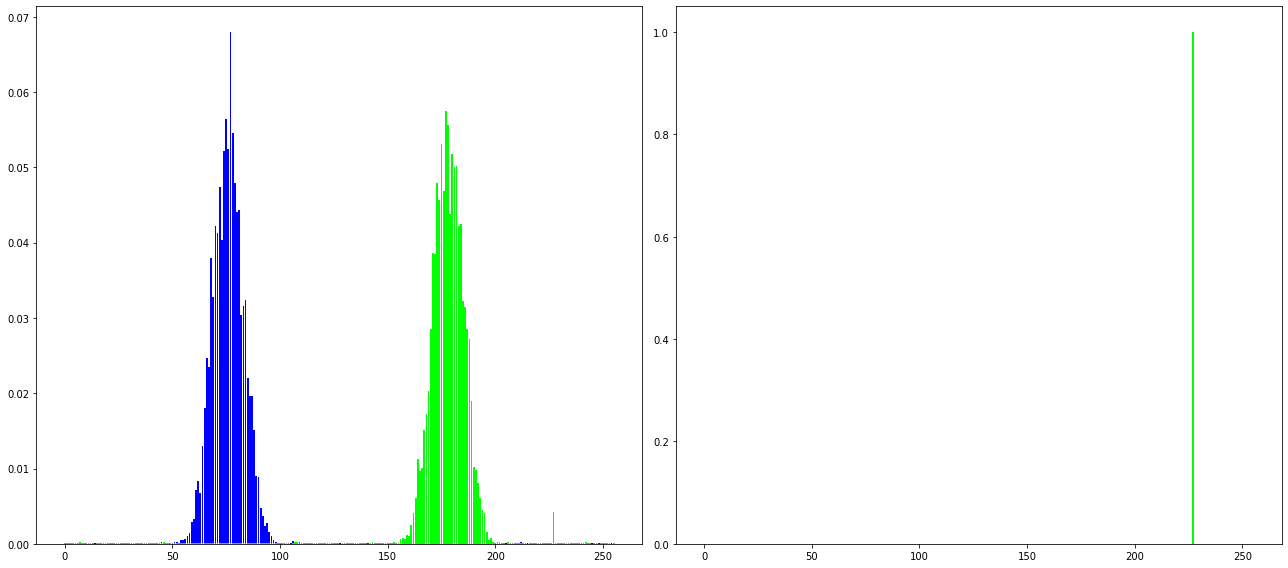

In [5]:
logits, _ = m.forward(X[:10])
plt.clf()
viz.plot_stereo_sample_distributions(logits, 0)
plt.show()